# Assignment #1

Please follow instruction below to complete your assingment. 
You are expected to provide:
- data files
- IPython notebook

Please use code blocks to comment and explain your code.

STUDENT ID: 27041

In [132]:
%matplotlib inline 
import os, sys
import json
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt



# Import any other package you may need

## Erdos-Renyi network simulation

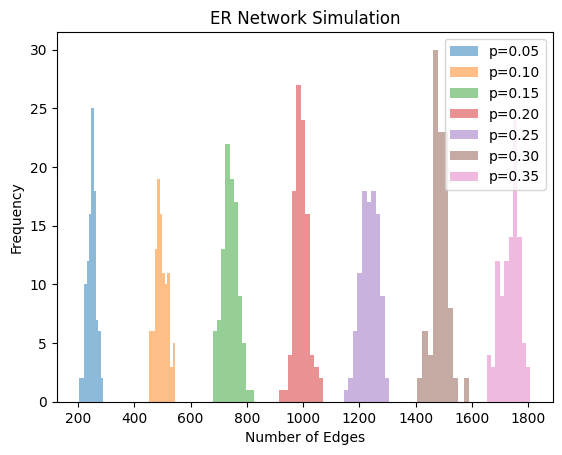

In [133]:
def simulate_erdos_renyi(N, p):
    graph = nx.Graph()
    
    '''
    Implement code for ER network generation.
    Please do not use nx.gnp_random_graph function here.
    '''

    # add N nodes to the graph
    graph.add_nodes_from(range(N))

    # connect each pair of nodes with probability p
    for i in range(N):
        for j in range(i+1, N):
            if np.random.rand() < p:
                graph.add_edge(i, j)
    return graph

'''
You will need to simulate 100 random initializations for 
p=0.05, p=0.1 and p=0.3 and 
plot distributions for number of edges in a single figure.
'''
# Try each value of p from 0.05 to 0.35 with step 0.05
p_range = np.arange(0.05, 0.36, 0.05)
N = 100

'''
Simulate 100 random initializations for each value of p
'''
num_edges = []
for p in p_range:
    edges = [] 
    for i in range(N):
        G = simulate_erdos_renyi(N, p)
        edges.append(G.number_of_edges())
    num_edges.append(edges)

'''
Plot the distribution of the number of edges for each value of p
'''
fig, ax = plt.subplots()
for i, p in enumerate(p_range):
    ax.hist(num_edges[i], alpha=0.5, label=f"p={p:.2f}")

ax.set_xlabel("Number of Edges")
ax.set_ylabel("Frequency")
ax.set_title("ER Network Simulation")
ax.legend()
plt.show()


# Network generation and node properties

Request and download dataset for your own social media accounts and analyze using network science methods.

If you are not a frequnt users, you can select 3 networks with different categorical subdomains using the database below.

https://icon.colorado.edu/#!/networks

Please keep the networks smaller than 10.000 nodes.

Explore the different algorithms available on networkx for node and graph level properties.
https://networkx.org/documentation/stable/reference/algorithms/index.html

1) You should cover at least 
- node clustering coefficient, degree, strength
- graph density, largest connected components size, radius

2) Plot degree distribution. Depending on the graph topology either use linear or logarithmic scale.

3) For each edge, plot heatmap for degree of the nodes at each end and discuss whether the network is assortative or disassortative.

Request and download dataset for your own social media accounts and analyze using network science methods.

If you are not a frequnt users, you can select 3 networks with different categorical subdomains using the database below.

https://icon.colorado.edu/#!/networks

Please keep the networks smaller than 10.000 nodes.

Explore the different algorithms available on networkx for node and graph level properties.
https://networkx.org/documentation/stable/reference/algorithms/index.html

1) You should cover at least 
- node clustering coefficient, degree, strength
- graph density, largest connected components size, radius

2) Plot degree distribution. Depending on the graph topology either use linear or logarithmic scale.

3) For each edge, plot heatmap for degree of the nodes at each end and discuss whether the network is assortative or disassortative.

### Network analysis

In [134]:
'''
    In this part I chose my Instagram account as the network. But there was
    only me to connected to others and I couldn't connect to each other some 
    how. If extra time is given, I will try to find some other method to 
    connect other people to each other.
'''

# Load the data from the JSON files
with open('following.json', 'r') as f:
    following_data = json.load(f)

with open('followers_1.json', 'r') as f:
    followers_data = json.load(f)

with open('liked_posts.json', 'r') as f:
    likes_data = json.load(f)

# Create an undirected graph for interactions data
G = nx.Graph()
G.add_node("emir_kantul")

for user in following_data['relationships_following']:
    G.add_node(user['string_list_data'][0]['value'])
    if G.has_edge("emir_kantul", user['string_list_data'][0]['value']):
        G["emir_kantul"][user['string_list_data'][0]['value']]['weight'] += 1
    else:
        G.add_edge("emir_kantul", user['string_list_data'][0]['value'], weight=1)

# Create an undirected graph for followers data
for user in followers_data:
    follower = user['string_list_data'][0]['value']
    # check if G already has the node
    if follower not in G.nodes:
        G.add_node(follower)
    if G.has_edge(follower, "emir_kantul"):
        G[follower]["emir_kantul"]['weight'] += 1
    else:
        G.add_edge(follower, "emir_kantul", weight=1)

# Create an undirected graph for likes data
for like in likes_data['likes_media_likes']:
    liked_post = like['string_list_data'][0]['value']
    if liked_post not in G.nodes:
        G.add_node(liked_post)
    if G.has_edge("emir_kantul", liked_post):
        G["emir_kantul"][liked_post]['weight'] += 1
    else:
        G.add_edge("emir_kantul", liked_post, weight=1)

# Calculate network properties
print("Clustering coefficient:", nx.average_clustering(G))
print("Density:", nx.density(G))
print("Largest connected component size:", len(max(nx.connected_components(G), key=len)))
print("Radius:", nx.radius(G))


Clustering coefficient: 0.0
Density: 0.001962708537782139
Largest connected component size: 1019
Radius: 1


/Users/emirkantul/Documents/Repos/network-science-practices/.venv/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 159 (\x9f) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/emirkantul/Documents/Repos/network-science-practices/.venv/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 145 (\x91) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/emirkantul/Documents/Repos/network-science-practices/.venv/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 141 (\x8d) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


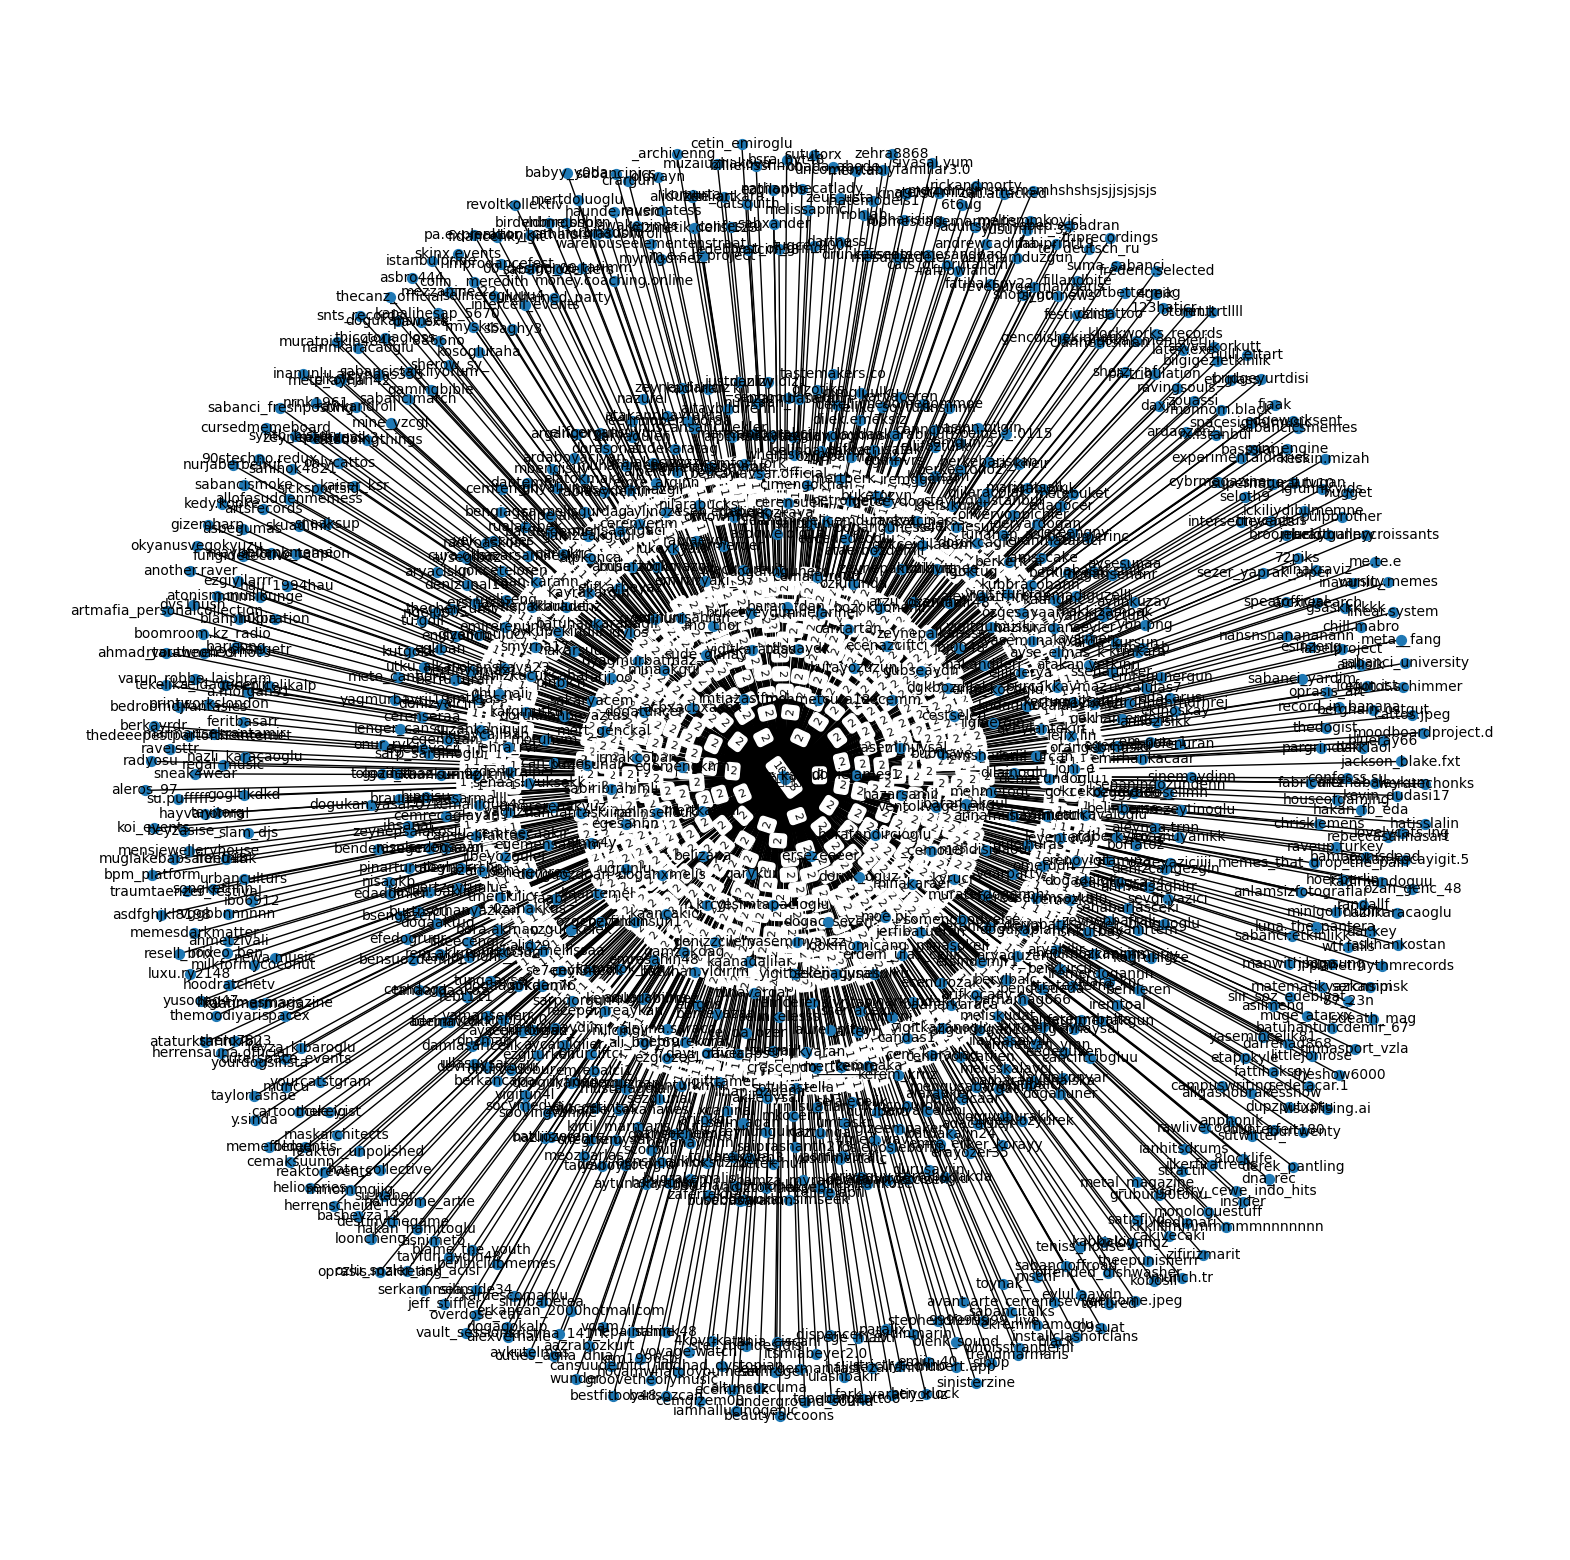

In [135]:
# Print the graph
pos = nx.spring_layout(G)
plt.figure(figsize=(20, 20))
nx.draw_networkx_nodes(G, pos, node_size=50)
nx.draw_networkx_edges(G, pos, width=1)

nx.draw_networkx_labels(G, pos, font_size=10, font_family="sans-serif")
edge_labels = nx.get_edge_attributes(G, "weight")
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=8)


# Show the graph
plt.axis("off")
plt.show()

### Plot degree distribution

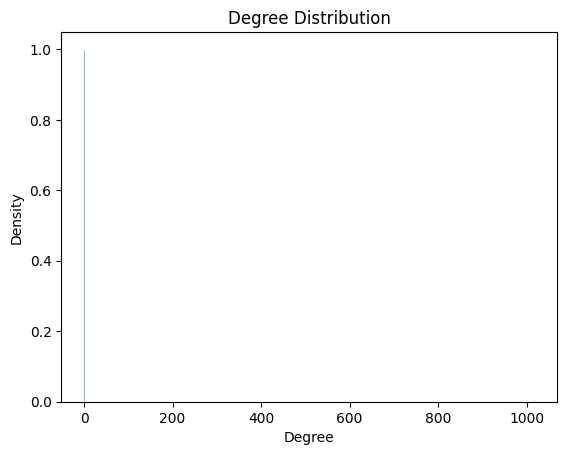

In [136]:

# Plot degree distribution
degree_sequence = sorted([d for n, d in G.degree()], reverse=True)
plt.hist(degree_sequence, bins=range(max(degree_sequence)+2), align='left', density=True, alpha=0.5)
plt.xlabel("Degree")
plt.ylabel("Density")
plt.title("Degree Distribution")
plt.show()

### Assortativeness analysis

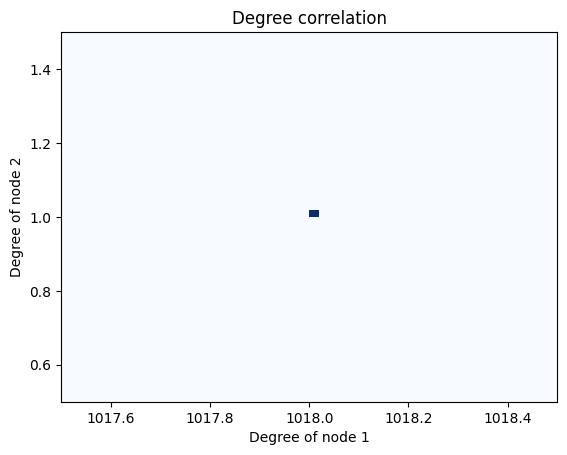

In [137]:
# Plot heatmap for degree correlation
degrees = dict(G.degree())
deg_corr = []
for edge in G.edges():
    deg_corr.append((degrees[edge[0]], degrees[edge[1]]))
x, y = zip(*deg_corr)
plt.hist2d(x, y, bins=50, cmap=plt.cm.Blues)
plt.xlabel('Degree of node 1')
plt.ylabel('Degree of node 2')
plt.title('Degree correlation')
plt.show()



Node clustering coefficient:
{'169441': 0.5256410256410257, '170026': 1.0, '171753': 1.0, '169074': 0.7575757575757576, '170097': 0.6727272727272727, '172887': 1.0, '170059': 1.0, '170582': 0.8333333333333334, '169068': 0.7435897435897436, '169077': 0.7575757575757576, '170133': 1.0, '169152': 0.7818181818181819, '169071': 0.43157894736842106, '171417': 1.0, '169227': 0.4166666666666667, '169004': 0.9111111111111111, '169019': 1.0, '169053': 0.8545454545454545, '169141': 1.0, '169133': 0.8545454545454545, '170205': 1.0}
Node degree:
{'169441': 13, '170026': 7, '171753': 3, '169074': 12, '170097': 11, '172887': 3, '170059': 7, '170582': 9, '169068': 13, '169077': 12, '170133': 7, '169152': 11, '169071': 20, '171417': 3, '169227': 16, '169004': 10, '169019': 9, '169053': 11, '169141': 9, '169133': 11, '170205': 7}
Node strength:
{'169441': 30.0, '170026': 7.0, '171753': 3.0, '169074': 14.0, '170097': 13.0, '172887': 3.0, '170059': 7.0, '170582': 10.0, '169068': 18.0, '169077': 14.0, '170

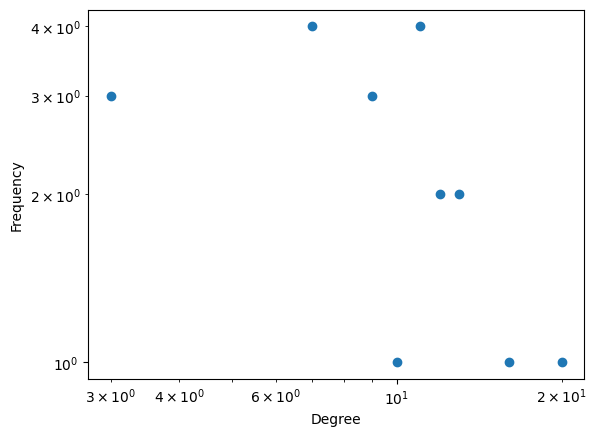

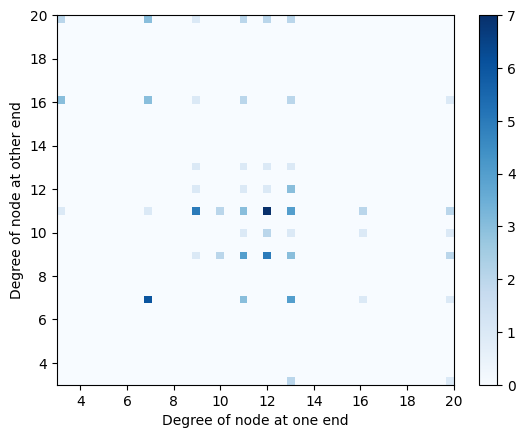

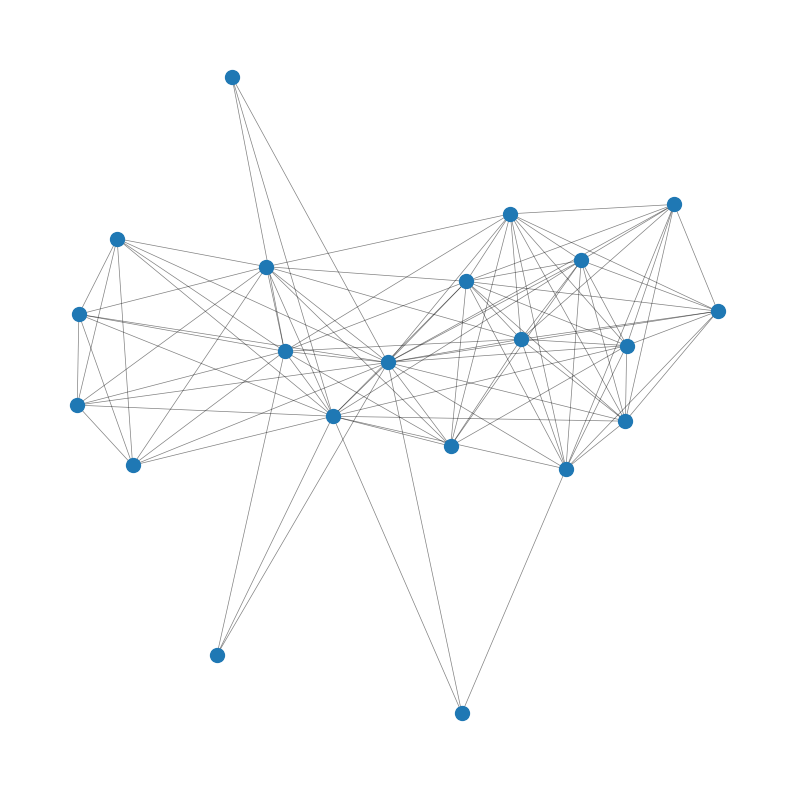

In [138]:
'''
    Since my social network is not good enough I also found a network from the given link and did the network analysis.
'''

# Load the graph from the GEXF file
G = nx.read_gexf("3.gexf")

# Compute node metrics
node_clustering = nx.clustering(G)
node_degree = dict(G.degree())
node_strength = dict(G.degree(weight='weight'))

# Compute graph metrics
graph_density = nx.density(G)
largest_cc = max(nx.connected_components(G), key=len)
radius = nx.radius(G)

# Print out the results
print("Node clustering coefficient:")
print(node_clustering)
print("Node degree:")
print(node_degree)
print("Node strength:")
print(node_strength)
print("Graph density:")
print(graph_density)
print("Largest connected component size:")
print(len(largest_cc))
print("Radius:")
print(radius)

# Plot the degree distribution
degree_values = sorted(set(node_degree.values()))
degree_histogram = [list(node_degree.values()).count(x) for x in degree_values]
plt.plot(degree_values, degree_histogram, 'o')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Degree')
plt.ylabel('Frequency')
plt.show()

# Compute edge degree heatmap
degrees = dict(G.degree())
edge_degrees = []
for u, v in G.edges():
    edge_degrees.append((degrees[u], degrees[v]))
x, y = zip(*edge_degrees)
plt.hist2d(x, y, bins=50, cmap='Blues')
plt.colorbar()
plt.xlabel('Degree of node at one end')
plt.ylabel('Degree of node at other end')
plt.show()


pos = nx.spring_layout(G)
plt.figure(figsize=(10, 10))
nx.draw_networkx_nodes(G, pos, node_size=100)
nx.draw_networkx_edges(G, pos, width=0.5, alpha=0.5)
plt.axis('off')
plt.show()

# Cayley tree

You can find more information about Cayley tree or bethe lattice below

https://en.wikipedia.org/wiki/Bethe_lattice

number of nodes: 488281
number of of nodes can be calculated as: 1 + k + k^2 +...+ k^d =  488281


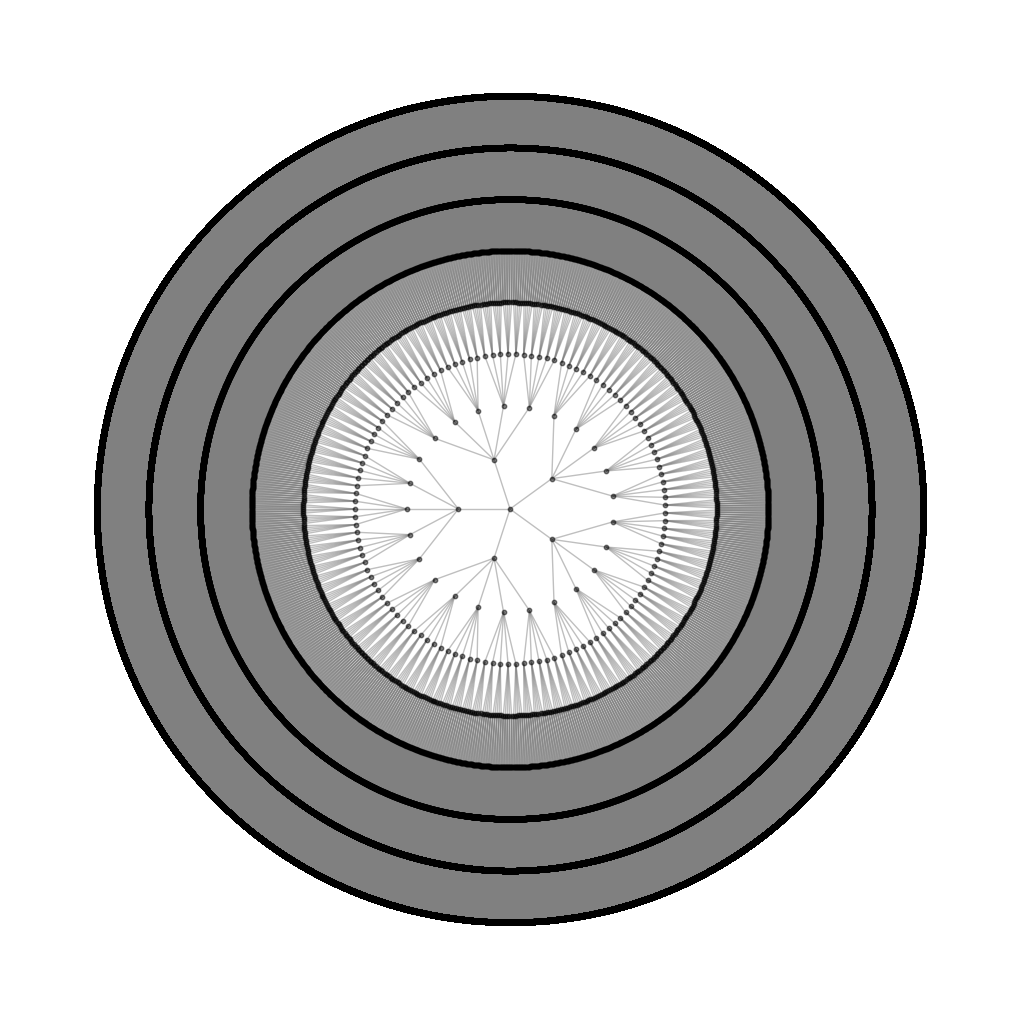

In [139]:
k = 5
d = 8

# generate a Cayley Tree with k children per node and depth d
G = nx.balanced_tree(k, d)

print("number of nodes:", G.number_of_nodes())
print("number of of nodes can be calculated as: 1 + k + k^2 +...+ k^d = ", G.number_of_nodes())

# set the position of nodes using tree layout
pos = nx.nx_agraph.graphviz_layout(G, prog='twopi', args="")
plt.figure(figsize=(10, 10)) # figure size


# draw the graph
nx.draw(G, pos, with_labels=False, node_size=10, alpha=0.5, node_color='black', edge_color='gray')
plt.axis("equal") # make the plot circular
plt.show()